In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('/data/data/final_data.csv')

In [13]:
movie_sth = pd.read_csv('/data/data/Movie.txt',sep='\t',encoding='utf-8')

In [16]:
all_movie_info = pd.merge(data,movie_sth,on=['mid'],how='left')

In [24]:
for i in all_movie_info.select_dtypes('object').columns:
    lbl = LabelEncoder()
    all_movie_info[i] = lbl.fit_transform(all_movie_info[i].fillna(-1).astype(str))

In [33]:
from sklearn.cross_validation import train_test_split
feature_name = [i for i in all_movie_info if i not in ['star']]
train_data,valid_data,train_label,valid_label = train_test_split(all_movie_info[feature_name],all_movie_info['star'],random_state=1998,test_size=0.2)

In [35]:
import lightgbm as lgb
dtrain = lgb.Dataset(train_data[feature_name], label=train_label.values)
dval = lgb.Dataset(valid_data[feature_name], label=valid_label.values)

params = {'learning_rate': 0.1,
          'metric': ['auc','binary_logloss'],
          'objective': 'binary',
          'nthread': 32,
          'num_leaves': 16,
          'colsample_bytree': 0.9,
          'bagging_fraction' : 0.9,
          'bagging_freq' : 10,
          'seed' : 2018,
        }
         
lgb_model = lgb.train(params, dtrain, 1000, dval, verbose_eval=10,early_stopping_rounds=100,)

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's binary_logloss: 0.354141	valid_0's auc: 0.96425
[20]	valid_0's binary_logloss: 0.261969	valid_0's auc: 0.968256
[30]	valid_0's binary_logloss: 0.230329	valid_0's auc: 0.970578
[40]	valid_0's binary_logloss: 0.216016	valid_0's auc: 0.972372
[50]	valid_0's binary_logloss: 0.207526	valid_0's auc: 0.973872
[60]	valid_0's binary_logloss: 0.202482	valid_0's auc: 0.974856
[70]	valid_0's binary_logloss: 0.198354	valid_0's auc: 0.975763
[80]	valid_0's binary_logloss: 0.195636	valid_0's auc: 0.976334
[90]	valid_0's binary_logloss: 0.193526	valid_0's auc: 0.976799
[100]	valid_0's binary_logloss: 0.191872	valid_0's auc: 0.977179
[110]	valid_0's binary_logloss: 0.190801	valid_0's auc: 0.977409
[120]	valid_0's binary_logloss: 0.189779	valid_0's auc: 0.977626
[130]	valid_0's binary_logloss: 0.188862	valid_0's auc: 0.977823
[140]	valid_0's binary_logloss: 0.188102	valid_0's auc: 0.977971
[150]	valid_0's binary_logloss: 0.187

In [50]:
# val_ans = lgb_model.predict(valid_data[feature_name])
from sklearn.metrics import recall_score,precision_recall_curve,precision_score,f1_score,classification_report
import matplotlib.pyplot as plt
# kfc = []
# for i in val_ans:
#     if i>=0.5:
#         kfc.append(1)
#     else:
#         kfc.append(0)
# f1_score(valid_label.values,val_ans)
print(classification_report(valid_label,kfc))

             precision    recall  f1-score   support

          0       0.94      0.93      0.93   1687832
          1       0.93      0.94      0.93   1685852

avg / total       0.93      0.93      0.93   3373684



In [53]:
test = pd.read_csv('siyuan/test.txt',sep='\t')

In [55]:
test['uid'].shape

(47033,)

In [57]:
len(set(test['uid'])&set(all_movie_info['uid'].unique()))

47012

In [64]:
k1 = all_movie_info.groupby(['uid']).apply(lambda x:x['mid'].count())
k1.mean()

347.0296658986175

In [68]:
k2 = all_movie_info.groupby(['mid']).apply(lambda x:x['uid'].count())

In [77]:
k2.shape

(72581,)

In [98]:
from pandas import DataFrame as DF
k3 = DF(k2).reset_index().rename(columns={0:'times'})
k3[k3['times']>=110].shape

(61723, 2)

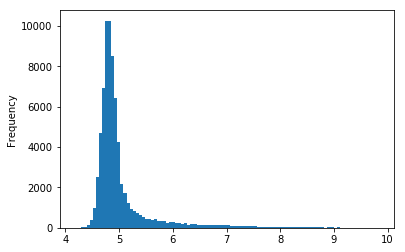

In [89]:
np.log1p(k3['times']).plot.hist(bins=100)

In [94]:
np.expm1(6)

402.4287934927351